In [171]:
%matplotlib inline
from __future__ import division
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brownian
reload(brownian)
import brownian.bayes as s
reload(brownian.bayes)
from brownian import calc_P_x0, Pf, u
from freqdemod import h5ls

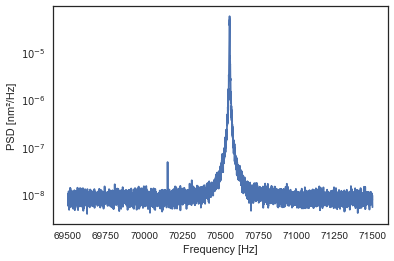

In [154]:
fh = h5py.File('brownian173033.h5', 'r')
f = fh['x'][:]
PSD = fh['y'][:]
m = (f > 69500) & (f < 71500)
plt.semilogy(fh['x'][m], fh['y'][m])
plt.xlabel("Frequency [Hz]")
plt.ylabel(u"PSD [nm²/Hz]")

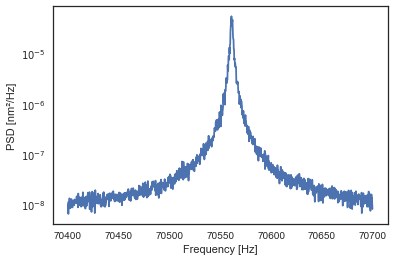

In [155]:
f = fh['x'][:]
m = (f > 70400) & (f < 70700)
plt.semilogy(fh['x'][m], fh['y'][m])
plt.xlabel("Frequency [Hz]")
plt.ylabel(u"PSD [nm²/Hz]")

In [156]:
fh['y'].attrs.items()

[(u'unit', 'nm^2/Hz'),
 (u'name', 'Power Spectral Density of Position Fluctuations'),
 (u'label', 'PSD [nm^2/Hz]'),
 (u'label_latex', '$P_{\\delta x} \\: [\\mathrm{nm}^2/\\mathrm{Hz}]'),
 (u'help',
  'Power spectral density, determined by converting peak-to-peak voltage to nm'),
 (u'n_avg', 32.0)]

In [157]:
d = s.np2data(f, PSD, 32, fmin=70400, fmax=70700,
              kc=3.5, Q=20000, sigma_Q=15000, sigma_kc=2.5,
              Pdet=1e-8, sigma_Pdet=3e-8, # Pdet, sigma_Pdet not required
             )

In [158]:
s.highlight_alternating??

In [159]:
df_samples = s.cmdstan_sample(d, 1000, 4,)

In [172]:
ppb = s.PlotCmdStanBrownian(d, df_samples, 'test-cmdstan')

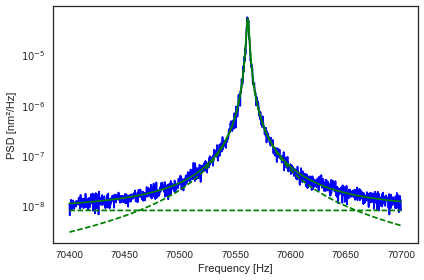

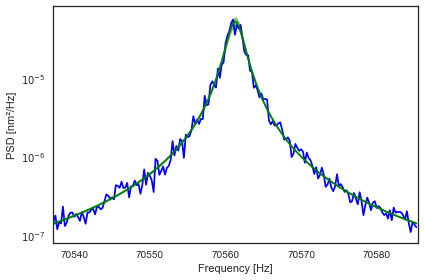

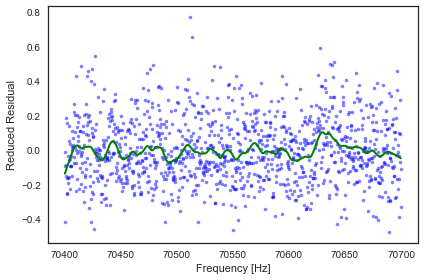

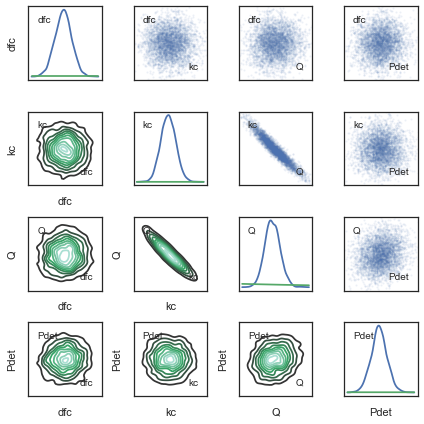

In [173]:
ppb.report(outfile='test-data-cmdstan',)

In [174]:
!open test-data-cmdstan.html

## Calculating dissipation $\Gamma$ using brownian data

First, get the values of the parameters sampled.

In [ ]:

def highlight_alternating(data, color='#D3D3D3'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)

    is_max = 1 == (np.arange(len(data.index)) % 2)
    return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)



In [114]:
describe = df_samples.describe()

8

In [15]:
fc = traces.get_values('dfc') + d['mu_fc']  # Add mean cantilever frequency to dfc
kc = traces.get_values('kc')
Q = traces.get_values('Q')

Next, calculate $\Gamma$ using our samples.

In [43]:
def gamma(fc, kc, Q):
    return kc / (2*np.pi*fc * Q)

Gamma = gamma(fc, kc, Q)
Gamma

array([  1.58096425e-09,   1.58096425e-09,   1.57879890e-09, ...,
         1.49406466e-09,   1.48423144e-09,   1.82279370e-09])

`Gamma` is an array containing estimates calculated from each sample. The different estimates can be plotted:

In [44]:
import seaborn as sns  # Pretty plots of samples

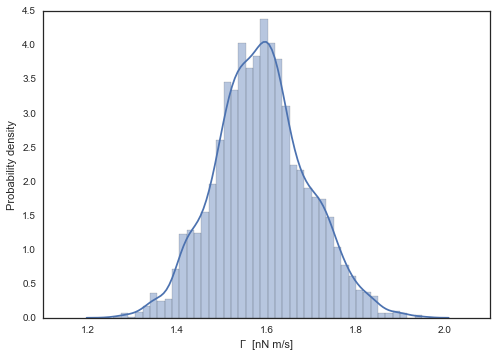

In [45]:
ax = sns.distplot(Gamma*1e9)
ax.set_xlabel(u"Γ  [nN m/s]")
ax.set_ylabel("Probability density")

And summarized with a mean and standard deviation:

In [48]:
print(u"Γ = {:.2f} ± {:.2f} [nN m/s]".format(
        Gamma.mean()*1e9,
        Gamma.std(ddof=1)*1e9)) # nN m /s

Γ = 1.59 ± 0.10 [nN m/s]
